In [15]:
import numpy as np
import pandas as pd

dat = pd.read_csv("C:\pds_project\cyberbullying_tweets.csv")


In [16]:
# Checking for null values (No null/nan values present)
print(dat.info())

print("\nData description = ")
dat.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB
None

Data description = 


,tweet_text,cyberbullying_type
count,47692,47692
unique,46006,6
top,#NAME?,religion
freq,12,7998


In [17]:
X = dat['tweet_text']
y = dat['cyberbullying_type']
print(X)
print(y)

0        In other words #katandandre, your food was cra...
1        Why is #aussietv so white? #MKR #theblock #ImA...
2        @XochitlSuckkks a classy whore? Or more red ve...
3        @Jason_Gio meh. :P  thanks for the heads up, b...
4        @RudhoeEnglish This is an ISIS account pretend...
                               ...                        
47687    Black ppl aren't expected to do anything, depe...
47688    Turner did not withhold his disappointment. Tu...
47689    I swear to God. This dumb nigger bitch. I have...
47690    Yea fuck you RT @therealexel: IF YOURE A NIGGE...
47691    Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...
Name: tweet_text, Length: 47692, dtype: object
0        not_cyberbullying
1        not_cyberbullying
2        not_cyberbullying
3        not_cyberbullying
4        not_cyberbullying
               ...        
47687            ethnicity
47688            ethnicity
47689            ethnicity
47690            ethnicity
47691            ethnicity
Name: c

In [18]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
import matplotlib.pyplot as plt
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train_new=cv.fit_transform(X_train)
X_test_new = cv.transform(X_test)

Accuracy obtained by KNN model = 0.6153684872628158

Classification report = 
                      precision    recall  f1-score   support

                age       0.90      0.91      0.91      1593
          ethnicity       0.95      0.76      0.85      1610
             gender       0.80      0.60      0.69      1614
  not_cyberbullying       0.33      0.37      0.35      1581
other_cyberbullying       0.34      0.69      0.46      1522
           religion       0.96      0.36      0.53      1619

           accuracy                           0.62      9539
          macro avg       0.71      0.62      0.63      9539
       weighted avg       0.72      0.62      0.63      9539


Confusion matrix = 
 [[1455    9    6   45   72    6]
 [  29 1228   22  123  194   14]
 [  19   20  969  228  376    2]
 [  38    8   57  578  900    0]
 [  13    5   74  379 1050    1]
 [  57   26   77  408  461  590]]


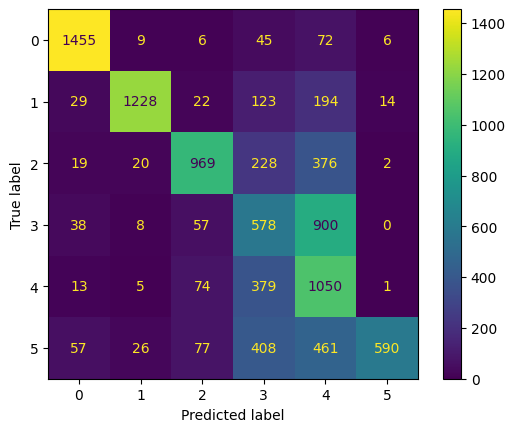

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=9)
import matplotlib.pyplot as plt
knn.fit(X_train_new,y_train)
y_pred = knn.predict(X_test_new)

print("Accuracy obtained by KNN model =",accuracy_score(y_test,y_pred))
print("\nClassification report = \n",classification_report(y_test,y_pred))
print("\nConfusion matrix = \n",confusion_matrix(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
cm_display.plot()
plt.show()

Accuracy obtained by Decision Tree Classifire = 0.799769367858266

Classification report = 
                      precision    recall  f1-score   support

                age       0.97      0.97      0.97      1593
          ethnicity       0.98      0.97      0.97      1610
             gender       0.86      0.85      0.85      1614
  not_cyberbullying       0.51      0.51      0.51      1581
other_cyberbullying       0.52      0.54      0.53      1522
           religion       0.96      0.94      0.95      1619

           accuracy                           0.80      9539
          macro avg       0.80      0.80      0.80      9539
       weighted avg       0.80      0.80      0.80      9539


Confusion matrix = 
 [[1546    1    3   29   13    1]
 [   3 1562    6   12   23    4]
 [   4    8 1367  114  118    3]
 [  28   13   98  814  578   50]
 [   4    9  109  572  819    9]
 [   4    5   11   55   23 1521]]


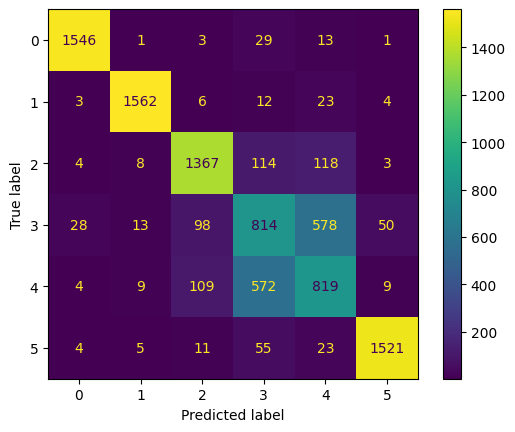

In [20]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()

tree.fit(X_train_new,y_train)
y_pred = tree.predict(X_test_new)

print("Accuracy obtained by Decision Tree Classifire =",accuracy_score(y_test,y_pred))
print("\nClassification report = \n",classification_report(y_test,y_pred))
print("\nConfusion matrix = \n",confusion_matrix(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
cm_display.plot()
plt.show()

Accuracy obtained by Logistic Regression = 0.8369850089107873

Classification report = 
                      precision    recall  f1-score   support

                age       0.97      0.98      0.97      1593
          ethnicity       0.99      0.98      0.98      1610
             gender       0.91      0.86      0.89      1614
  not_cyberbullying       0.60      0.59      0.59      1581
other_cyberbullying       0.59      0.65      0.62      1522
           religion       0.97      0.95      0.96      1619

           accuracy                           0.84      9539
          macro avg       0.84      0.83      0.84      9539
       weighted avg       0.84      0.84      0.84      9539


Confusion matrix = 
 [[1556    3    3   20   11    0]
 [   1 1575    5   10   17    2]
 [   4    2 1393   98  112    5]
 [  25    5   54  930  528   39]
 [  10    3   70  445  991    3]
 [   4    2    7   50   17 1539]]


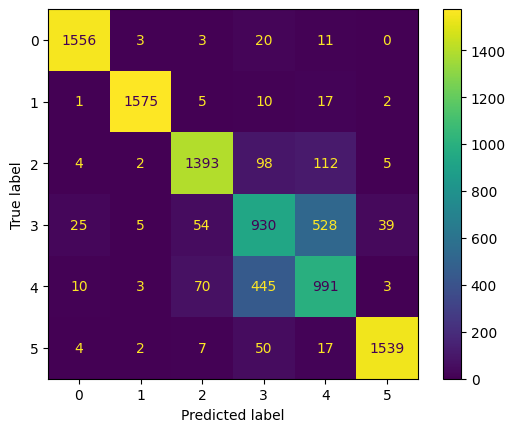

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr.fit(X_train_new,y_train)
y_pred = lr.predict(X_test_new)
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

print("Accuracy obtained by Logistic Regression =",accuracy_score(y_test,y_pred))
print("\nClassification report = \n",classification_report(y_test,y_pred))
print("\nConfusion matrix = \n",confusion_matrix(y_test,y_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix(y_test,y_pred))
cm_display.plot()
plt.show()

In [31]:

# Load the dataset
data = pd.read_csv("C:\pds_project\cyberbullying_tweets.csv")

# Get the user input for the type of tweet to predict
tweet_type = input('Enter the type of tweet to predict (religion,gender,ethnicity,cyberbullying,not_cyberbullying): ')

# Filter the dataset based on the user input
data = data[data['cyberbullying_type'] == tweet_type]

# Get the user input for the number of tweets to display
num_tweets = int(input('Enter the number of tweets to display: '))

# Define the features and labels
X = data['tweet_text'][:num_tweets]
y = data['cyberbullying_type'][:num_tweets]


print(X)

7945    rape is real..zvasiyana nema jokes about being...
7946    You never saw any celebrity say anything like ...
7947    @ManhattaKnight I mean he's gay, but he uses g...
7948    RT @Raul_Novoa16: @AliciaBernardez @Alex_Aim @...
7949    Rape is rape. And the fact that I read one pos...
7950    @coiny Also, it's hard to take a company serio...
7951    Idgaf if you are gay, lesbian, bisexual, or wh...
7952    #GermanProfessor gives meaning to term FemiNaz...
7953    RT @mcclure111: #DontDateSJWs #ThatWouldBeAVio...
7954    So I call you female I’m basically calling you...
7955    Simple things please simple minds. @pumpkinkin...
7956    I know the worst feeling for a female gotta be...
7957    SO HILARIOUS U WRITE UR OWN MATERIAL? @JesseEl...
7958    “We voted for a guy who said he’d rather have ...
7959    I always get fucking pissed when I see a man j...
7960    men who call women ‘females’ or ‘bitches’ have...
7961    In a world where race jokes , gay jokes , and ...
7962    RT @be

In [34]:

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train_new=cv.fit_transform(X_train)
X_test_new = cv.transform(X_test)

In [35]:
import warnings
warnings.filterwarnings("ignore")

print("The Key words obtained by count vectorization = \n",cv.get_feature_names_out())


The Key words obtained by count vectorization = 
 ['2017' '_little_old_me' 'about' 'acceptable' 'actually' 'agenda'
 'akdldkakakkd' 'almost' 'also' 'amp' 'an' 'and' 'annoyed' 'any' 'anymore'
 'anything' 'are' 'aren' 'as' 'ass' 'basically' 'bc' 'bcz' 'be' 'beaver'
 'beavergate' 'beheading' 'being' 'best' 'better' 'big' 'bisexual' 'bitch'
 'bitches' 'bitchy' 'black' 'blonde' 'break' 'but' 'call' 'calling' 'can'
 'case' 'cat' 'celebrity' 'child' 'choice' 'claimed' 'coiny' 'colbert'
 'comedy' 'coming' 'company' 'consider' 'dammit' 'dead' 'degrading' 'dick'
 'did' 'discribe' 'do' 'does' 'doesn' 'don' 'dontdatesjws' 'drawplaydave'
 'drunk' 'energy' 'even' 'feeling' 'female' 'females' 'feminazi' 'focus'
 'for' 'from' 'fuck' 'fucken' 'game' 'gay' 'gays' 'gendered'
 'germanprofessor' 'girls' 'gives' 'go' 'good' 'gotta' 'griffin' 'guy'
 'ha' 'harassment' 'hard' 'has' 'have' 'he' 'her' 'here' 'hire' 'his'
 'history' 'homophobic' 'hope' 'how' 'hungry' 'hurt' 'idgaf' 'if' 'in'
 'incest' 'indian' 'i